In [1]:
import pandas  as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated().sum()

418

In [10]:
df = df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


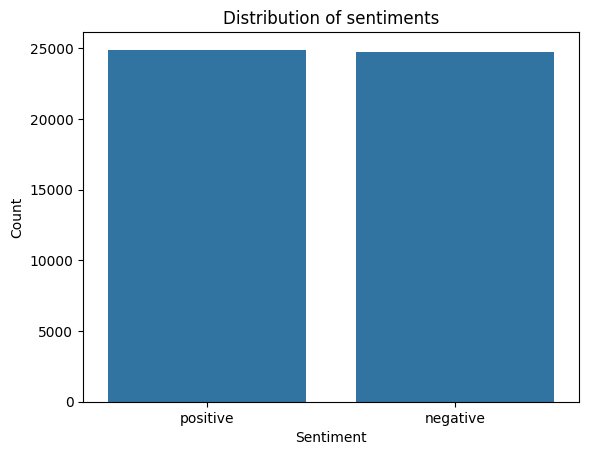

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [15]:
df['review_length'] = df['review'].apply(len)

In [16]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


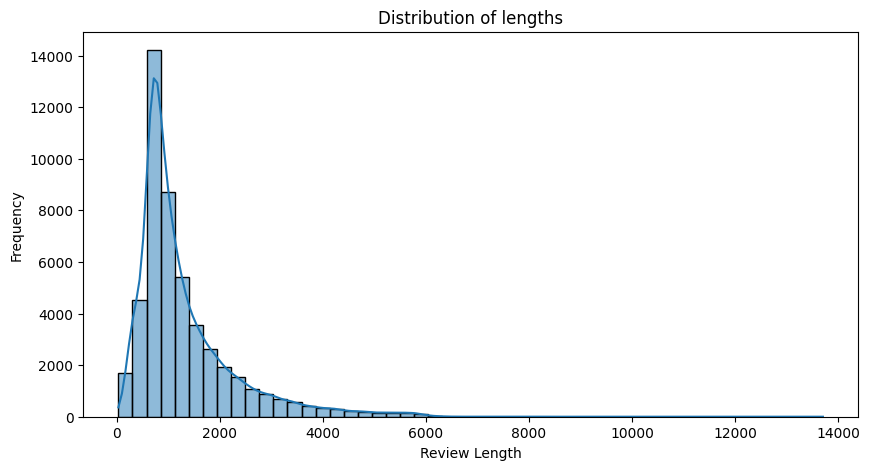

In [18]:
plt.figure(figsize= (10,5))
sns.histplot(df['review_length'],bins=50, kde=True)
plt.title("Distribution of lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

In [23]:
pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


(-0.5, 399.5, 299.5, -0.5)

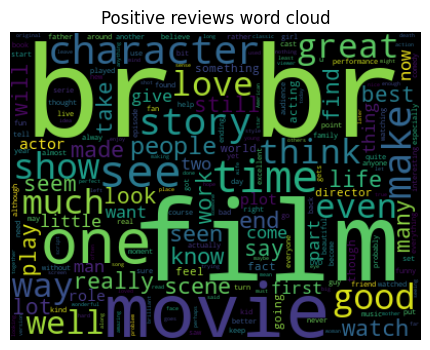

In [26]:
from wordcloud import WordCloud
positive_reviews = "".join(df[df['sentiment'] == 'positive']['review'])
plt.figure(figsize = (10, 4))
wordcloud_positive = WordCloud(height = 300, width = 400, background_color = 'black').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation = 'bilinear')
plt.title("Positive reviews word cloud")
plt.axis('off')

(-0.5, 399.5, 499.5, -0.5)

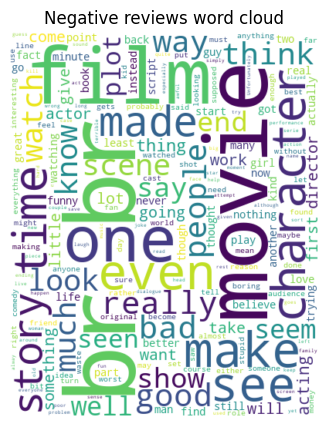

In [29]:
negative_reviews = "".join(df[df['sentiment'] == 'negative']['review'])
plt.figure(figsize = (10,5))
wordcloud_negative = WordCloud(height= 500, width = 400, background_color = 'white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation = 'bilinear')
plt.title("Negative reviews word cloud")
plt.axis('off')

In [31]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
from nltk.corpus import stopwords

In [37]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [39]:
def remove_stopwords(text):
    new_text =  [word for word in text.split() if word not in stop_words]
    return ''.join(new_text)

df['review'] = df['review'].apply(remove_stopwords)

In [40]:
X = df['review']
y = df['sentiment'].apply(lambda x:1 if x == 'positive' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
print(type(X_train), X_train.shape if hasattr(X_train, 'shape') else len(X_train))
print(type(y_train), y_train.shape if hasattr(y_train, 'shape') else len(y_train))

<class 'pandas.core.series.Series'> (39665,)
<class 'pandas.core.series.Series'> (39665,)


In [46]:
X_train = X_train.tolist()  # Convert to list
y_train = y_train.tolist()  # Convert to list

In [48]:
print(type(X_train), X_train.shape if hasattr(X_train, 'shape') else len(X_train))
print(type(y_train), y_train.shape if hasattr(y_train, 'shape') else len(y_train))

<class 'list'> 39665
<class 'list'> 39665


In [50]:
print(X_train[:5])
print(y_train[:5]) 

['Ireallylikedmovie\'TheEmporer\'sNewGroove\',watchinglikecominghomeseeingwife"relations"llama.Seriously,moviebad.It\'slikeClubDreadSuperTroopers.Isupposedwrite10lines,Ievenknowelsesay.Ilaughedcoupletimes,Idrinking.Amovielikeleastfunnydrunk.Itnot.Maybellamasjustfunnyregularcartoonpeoplearen\'t.Eitherway,juststickTheEmporer\'sNewGroovewantfunny,cartoon,llama-themedmovie.Line10linerighthere.', 'Idecidedwatchmovienoted"scariestmovieever"so,Iexpected.Unfortunately,Ifoundmoviesinglescarymoment(andI\'mkindpersonjumpseasily).Themovienothingterribleclichéseverytimejump-momentincrediblyobvious.Theprosmoviemusicoddscenethatsactuallyshotwell(likelastsceneopensdoorseeTunreflectionswingsbackseeghostshoulders).Overall,moviereallyaddednothingnewJ-Horrorgenreall-aroundlackedcreativityscares.', 'It\'shardsayjustgoing"TheLadyShanghai"filmwithoutstudiointerference.OrsonWelles\'primeinterestfilmpointraisemoneytheater;indeed,fundingprojectsdroveseekactingjobs.Hemade"LadyShanghai"soonex-wife,RitaHayworth.Ha

In [52]:
X = df['review']
y = df['sentiment'].apply(lambda x:1 if x == 'positive' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (2,2))),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('classifier', LogisticRegression())])

In [57]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.59


In [58]:
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(2, 2))),
    ('Naive Bayes', MultinomialNB())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('Naive Bayes', MultinomialNB())])

In [59]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")

Naive Bayes Accuracy: 0.60


To increase the accuracy we have to do more preprocessing

In [60]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [61]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [62]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6968841383482908

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.68      4939
           1       0.68      0.76      0.71      4978

    accuracy                           0.70      9917
   macro avg       0.70      0.70      0.70      9917
weighted avg       0.70      0.70      0.70      9917

